In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('Data/Train_Test/X_train.csv').to_numpy()
y_train = pd.read_csv('Data/Train_Test/y_train.csv').to_numpy()
X_test = pd.read_csv('Data/Train_Test/X_test.csv').to_numpy()
y_test = pd.read_csv('Data/Train_Test/y_test.csv').to_numpy()

In [3]:
dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [4]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [5]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: -0.173335727265147


In [6]:
mse = cross_val_score(dtree,X_train,y_train,cv=5)
mean_mse = mse.mean()
print(mean_mse)

-0.0657963537395789


In [7]:
pred = dtree.predict(X_test)

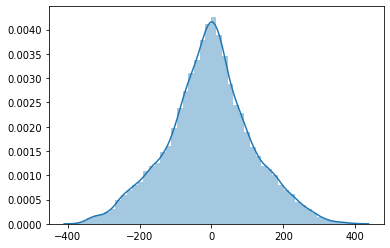

In [8]:
sns.distplot(y_test-pred)

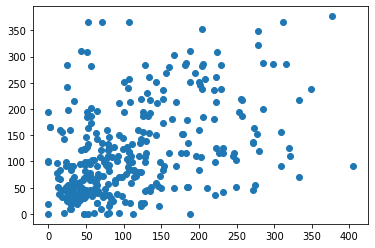

In [9]:
plt.scatter(y_test,pred)

In [10]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 65.24735649546828
MSE: 8004.687770329809
RMSE: 89.46892069500899


### Hyperparameter tunning using Decison tree

In [11]:

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [12]:
dtree = DecisionTreeRegressor()
dtree_grid = GridSearchCV(dtree,param_grid=params,scoring = 'neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [13]:
dtree_grid.fit(X_train,y_train)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 6668 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 27148 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 55820 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 92684 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  1.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                

In [14]:
dtree_grid.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 40,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [16]:
dtree_grid.best_score_

-4144.565691724566

In [17]:
pred = dtree_grid.predict(X_test)

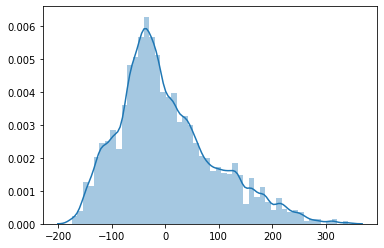

In [18]:
sns.distplot(y_test-pred)

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 59.6532921828951
MSE: 6113.83231042602
RMSE: 78.19099890924798


In [21]:
# open a file, where you ant to store the data
file = open('decision_tree_regressor.pkl', 'wb')

# dump information to that file
pickle.dump(dtree_grid, file)